## 探索数据

在得到数据之后的第一步应当是探索数据，得到一些数据的直观结果之后才可以清洗以及分析建模等

In [5]:
import math
import random
from collections import Counter
from matplotlib import pyplot as plt

In [8]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [7]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001): 
    """find approximate inverse using binary search"""
    # 如果非标准型，先调整单位使之服从标准型
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10)是(非常接近)0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10)是(非常接近)1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # 考虑中点
        mid_p = normal_cdf(mid_z)  # 和cdf在那里的值
        if mid_p < p:
            # midpoint仍然太低，搜索比它大的值
            low_z, low_p = mid_z, mid_p 
        elif mid_p > p:
            # midpoint仍然太高，搜索比它小的值
            hi_z, hi_p = mid_z, mid_p
        else: 
            break
    return mid_z

In [24]:
def bucketsize(point, bucket_size):
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    return Counter(bucketsize(point , bucket_size) for point in points)

def polt_histogram(points, bucket_size, title=""):
    his = make_histogram(points, bucket_size)
    plt.bar(list(his.keys()), his.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [9]:
random.seed(0)

uniform = [200 * random.random() for _ in range(10000)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

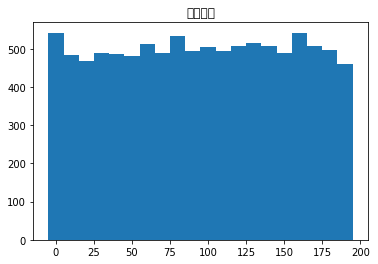

In [25]:
polt_histogram(uniform, 10, '均匀分布') #这里有问题

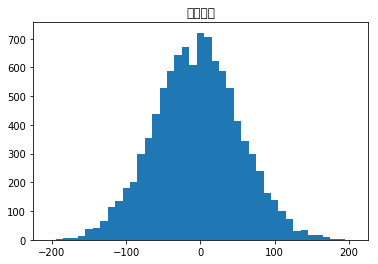

In [26]:
polt_histogram(normal, 10, '正态分布')